# 1. Plotting and graphics

At the moment, Julia does not have any graphics functionality "built-in"; however there are several 3rd party libraries that can be used instead.

To install, use `Pkg.add("pkgname")` to install.

## PyPlot

PyPlot.jl is a wrapper around the Python matplotlib library. The interface is quite close to that of Matlab's.

In [2]:
using PyPlot

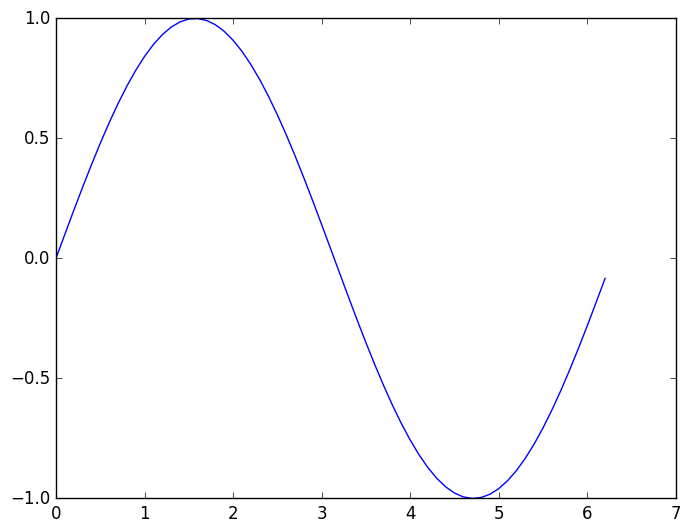

1-element Array{Any,1}:
 PyObject <matplotlib.lines.Line2D object at 0x31f616d50>

In [7]:
x = 0:0.1:2pi
plot(x,sin(x))

It works quite nicely with the Jupyter notebooks, as you can add multiple plot statements and these will be applied at the end of each cell:

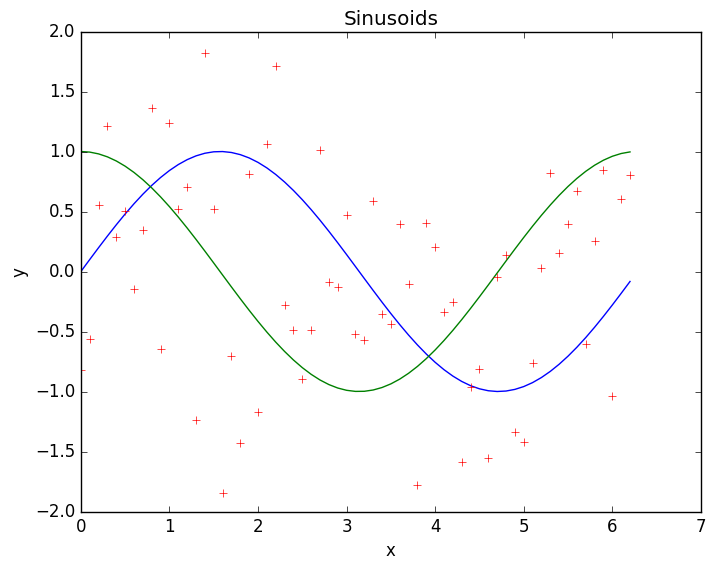

PyObject <matplotlib.text.Text object at 0x322470710>

In [46]:
plot(x,sin(x))
plot(x,cos(x))

plot(x,randn(length(x)),"r+")
title("Sinusoids")
xlabel("x")
ylabel("y")

Here the 3rd argument of plot is a [matplotlib format specifier string](http://matplotlib.org/api/pyplot_api.html#matplotlib.pyplot.plot):
* `r`: specifies red
* `+`: specifies + marker

Various other plot types are available, including subplots, 3D plots:

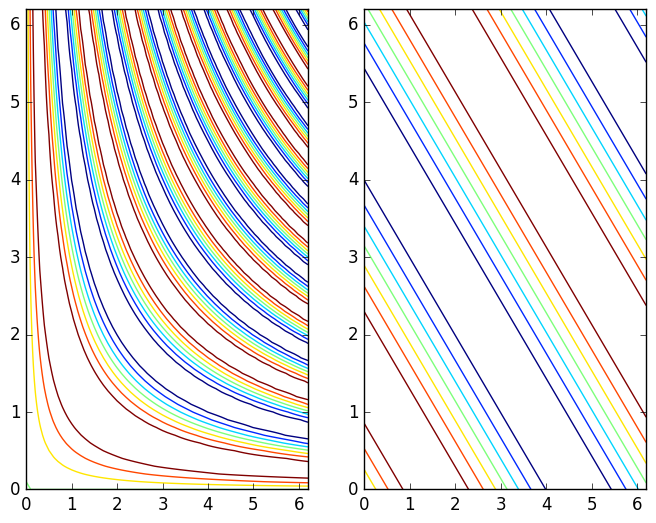

PyObject <matplotlib.contour.QuadContourSet object at 0x32547ab10>

In [76]:
y = x
subplot(1,2,1) # 1 row, 2 columns, plot 1
contour(x, y, sin(x.*y'))

subplot(1,2,2) # 1 row, 2 columns, plot 2
contour(x, y, sin(x.+y'))

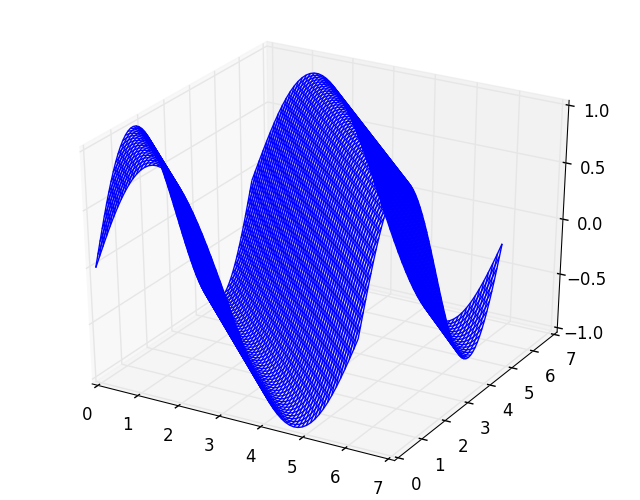

PyObject <mpl_toolkits.mplot3d.art3d.Line3DCollection object at 0x324711d50>

In [73]:
mesh(x,y,sin(x.+y'))

For more details, see [matplotlib pyplot documentation](http://matplotlib.org/api/pyplot_api.html).

## Gadfly

Gadfly is based on the "Grammar of Graphics" by Leland Wilkinson, similar to the `ggplot2` package in R (but without the abuse of `+`).

By default, the output plots are interactive SVG images.

In [52]:
using Gadfly
# you don't usually need this: it's only to overwrite existing plot from PyPlot
plot = Gadfly.plot

plot (generic function with 6 methods)

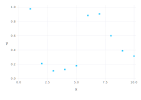

In [53]:
plot(x=1:10,y=rand(10))

There are various aesthetics that can be modified.

## Coordinates
The *coordinates* of the plot are provided by keyword arguments (e.g. `x`, `y`, `color`)

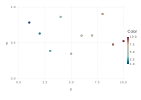

In [54]:
plot(x=1:10,y=rand(10),color=1:10)

## Geometries

*Geom* objects specify the type of plot: these are provided as extra arguments.

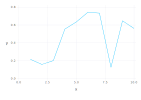

In [65]:
plot(x=1:10,y=rand(10),Geom.line)

Multiple Geoms can be provided per plot; some also incorporate some statistical functionality.

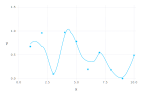

In [66]:
plot(x=1:10,y=rand(10),
    Geom.point,
    Geom.smooth(method=:loess,smoothing=0.5))

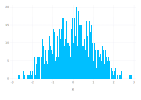

In [67]:
plot(x=randn(1000),Geom.histogram)

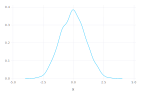

In [68]:
plot(x=randn(1000),Geom.density)

### Scale

*Scale* objects determine the mapping between data and plot coordinates

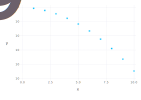

In [59]:
plot(x=1:10,y=erfc(1:10),
    Scale.y_log10)

*Guide* objects provide extra detail, typically outside the plotting area.

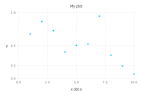

In [60]:
plot(x=1:10,y=rand(10),
    Guide.title("My plot"),
    Guide.xlabel("x data"),
    Guide.yticks(ticks=[0,0.2,0.5,1]))

There is also a simple, but distinct, interface for plotting functions

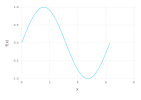

In [61]:
plot(sin,0,2pi)

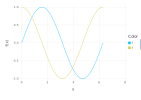

In [62]:
plot([sin,cos],0,2pi)

Multiple elements can be combined with `layer`:

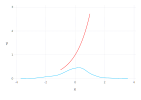

In [63]:
plot(
    layer(x=randn(100), Geom.density),
    layer(exp,-1,1, Theme(default_color=colorant"red")))

### Alternatives

Gadfly does have some drawbacks (it is slow for large numbers of points). Some alternatives:

* PlotlyJS.jl: Interactive plots using PlotlyJS.
* PGFPlots.jl: Outputs nice PGF graphics for inclusion in LaTeX.
* ASCIIPlots.jl: For when you only have terminal access.
* Plots.jl: A plotting interface which allows you to switch between backends.
* RCall.jl: the R-Julia interface.